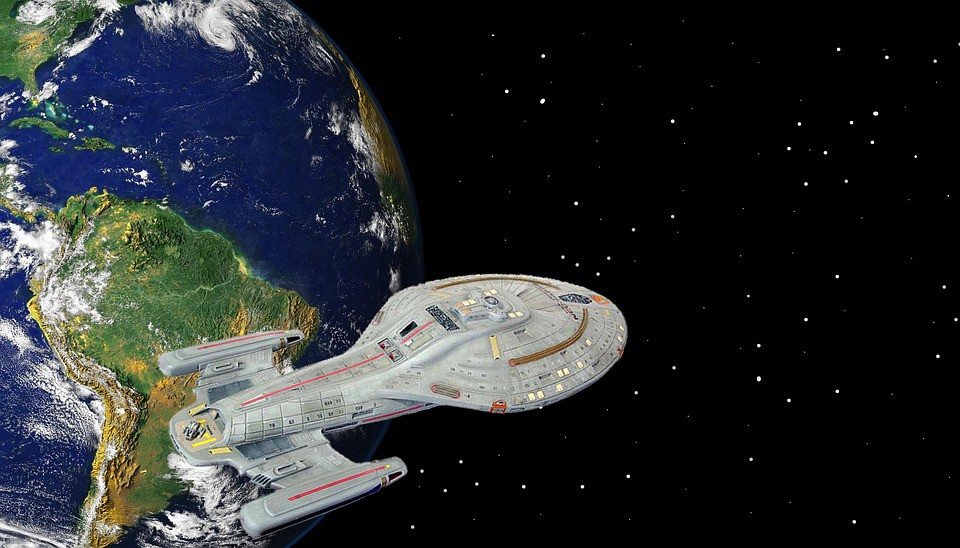

## `Data Description`
____
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

### File and Data Field Descriptions
**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- **`PassengerId`** - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.
- **`HomePlanet`** - The planet the passenger departed from, typically their planet of permanent residence.
- **`CryoSleep`** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **`Cabin`** - The cabin number where the passenger is staying. Takes the form `deck/num/side`, where `side` can be either `P` for Port or `S` for Starboard.
- **`Destination`** - The planet the passenger will be debarking to.
- **`Age`** - The age of the passenger.
- **`VIP`** - Whether the passenger has paid for special VIP service during the voyage.
- **`RoomService`**, **`FoodCourt`**, **`ShoppingMall`**, **`Spa`**, **`VRDeck`** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **`Name`** - The first and last names of the passenger.
- **`Transported`** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


______
## `1. Data Acquisition`
- The Python Pandas packages helps us work with our datasets. We start by acquiring the training dataset into Pandas DataFrames, and take a first look of our Dataframe using pandas descriptive statitstics functions

### Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Space Ship.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## `2. Data Cleaning`

In [3]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].median(), inplace= True)
df.dropna(inplace= True)

df.shape

(6757, 14)

In [5]:
# check nulls again:
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

## `3. Feature Engineering`

In [6]:
df[["GroupId", "GroupPassengerId"]] = df["PassengerId"].str.split("_", expand = True).astype(int)
df.drop(['PassengerId', 'GroupId'], axis= 1, inplace= True)

df[["Deck", "CabinNum", "Side"]] = df['Cabin'].str.split("/", expand = True)
df.drop(['Cabin', 'CabinNum'], axis= 1, inplace= True)

df[["Fname", "Last_name"]] = df['Name'].str.split(" ", expand = True)
df.drop(['Name', 'Fname'], axis= 1, inplace= True)

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupPassengerId,Deck,Side,Last_name
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,P,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,F,S,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,A,S,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,A,S,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,F,S,Santantines


### count and drop duplicates

In [7]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.reset_index(drop= True, inplace= True)

5


## `4. Exploratory Data Analysis [ EDA ]`

In [8]:
df.shape

(6752, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6752 entries, 0 to 6751
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        6752 non-null   object 
 1   CryoSleep         6752 non-null   object 
 2   Destination       6752 non-null   object 
 3   Age               6752 non-null   float64
 4   VIP               6752 non-null   object 
 5   RoomService       6752 non-null   float64
 6   FoodCourt         6752 non-null   float64
 7   ShoppingMall      6752 non-null   float64
 8   Spa               6752 non-null   float64
 9   VRDeck            6752 non-null   float64
 10  Transported       6752 non-null   bool   
 11  GroupPassengerId  6752 non-null   int32  
 12  Deck              6752 non-null   object 
 13  Side              6752 non-null   object 
 14  Last_name         6752 non-null   object 
dtypes: bool(1), float64(6), int32(1), object(7)
memory usage: 718.8+ KB


In [10]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupPassengerId
count,6752.000000,6752.00000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000
mean,28.859745,221.77814,476.687500,176.804947,315.231931,302.558501,1.517180
std,14.372379,641.07784,1669.663731,572.019035,1151.896569,1121.022497,1.053593
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,37.000000,48.25000,80.250000,29.000000,65.000000,49.250000,2.000000
max,79.000000,9920.00000,29813.000000,12253.000000,22408.000000,20336.000000,8.000000


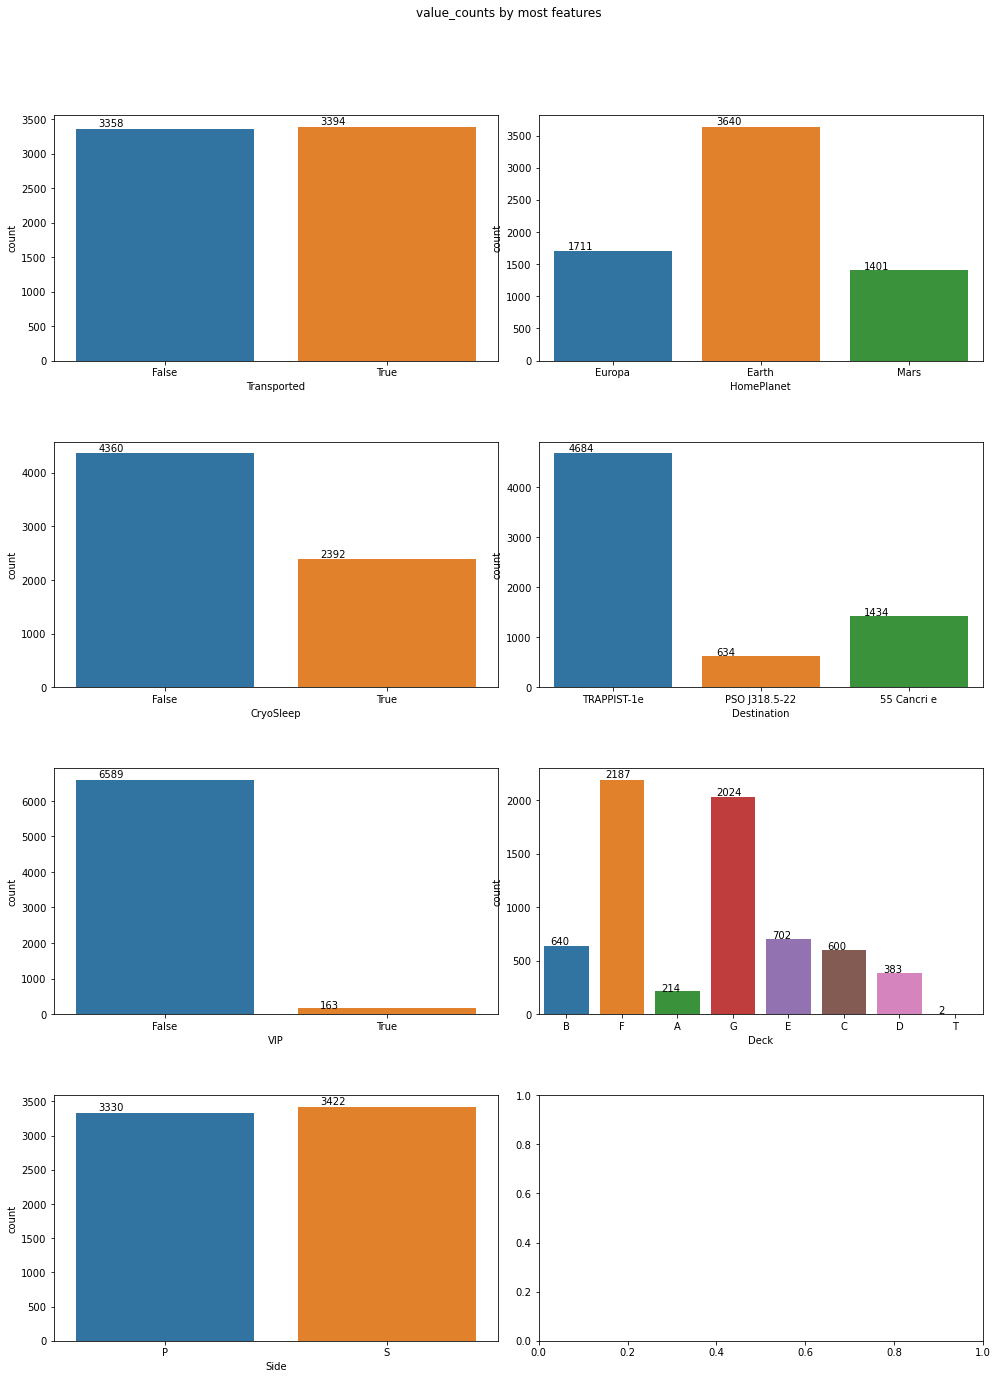

In [11]:
# plot countplot for some features, to examine their classes:
fig, axes = plt.subplots(4, 2, figsize=(15,20))

fig.suptitle('value_counts by most features ')
fig.tight_layout(pad=6, w_pad= True)

ax1= sns.countplot(ax=axes[0, 0], data=df, x='Transported')
for p in ax1.patches:
    ax1.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax2= sns.countplot(ax=axes[0, 1], data=df, x='HomePlanet')
for p in ax2.patches:
    ax2.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax3= sns.countplot(ax=axes[1, 0], data=df, x='CryoSleep')
for p in ax3.patches:
    ax3.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

ax4= sns.countplot(ax=axes[1, 1], data=df, x='Destination')
for p in ax4.patches:
    ax4.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

ax5= sns.countplot(ax=axes[2, 0], data=df, x='VIP')
for p in ax5.patches:
    ax5.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

ax6= sns.countplot(ax=axes[2, 1], data=df, x='Deck')
for p in ax6.patches:
    ax6.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax7= sns.countplot(ax=axes[3, 0], data=df, x='Side')
for p in ax7.patches:
    ax7.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

plt.show()


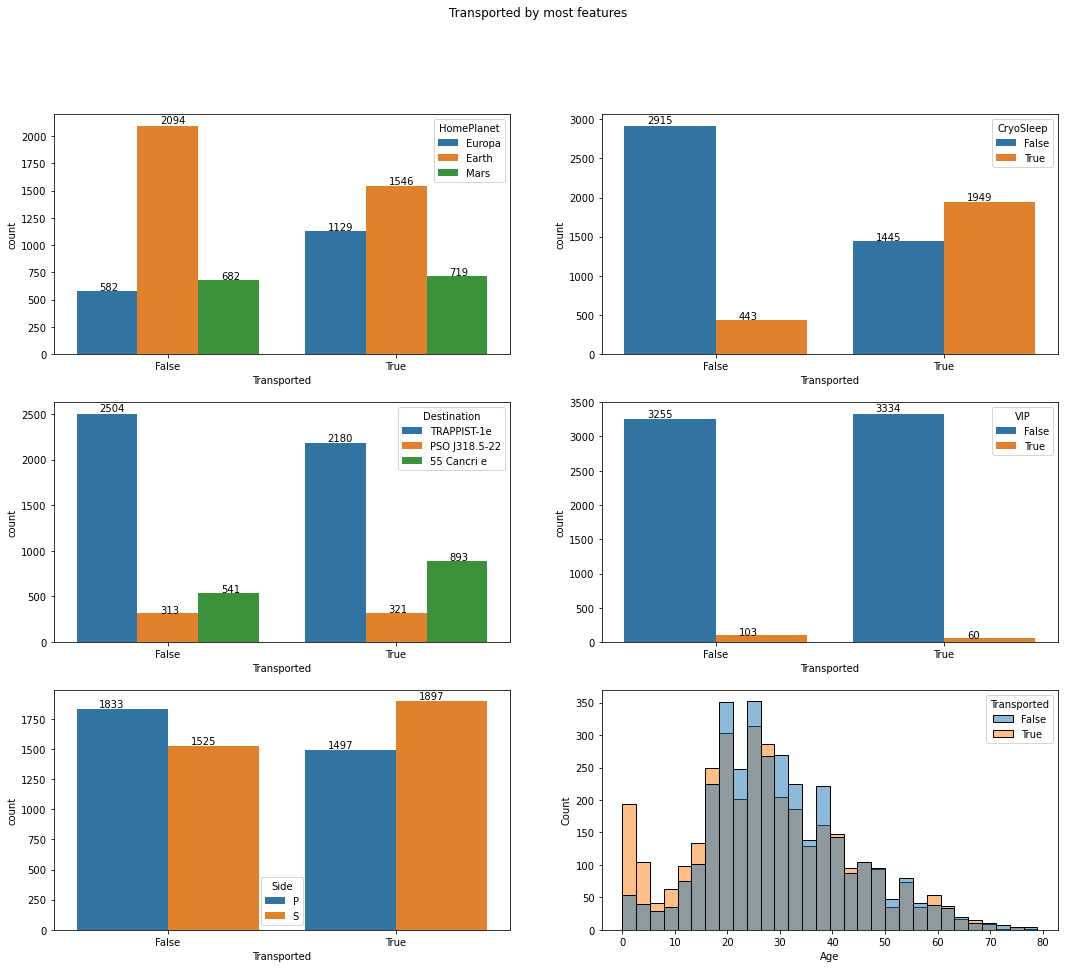

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(18,15))

fig.suptitle('Transported by most features ')

ax1= sns.countplot(ax=axes[0, 0], data=df, x='Transported', hue='HomePlanet')
for p in ax1.patches:
    ax1.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax2= sns.countplot(ax=axes[0, 1], data=df, x='Transported', hue='CryoSleep')
for p in ax2.patches:
    ax2.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

ax3= sns.countplot(ax=axes[1, 0], data=df, x='Transported', hue='Destination')
for p in ax3.patches:
    ax3.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax4= sns.countplot(ax=axes[1, 1], data=df, x='Transported', hue='VIP')
for p in ax4.patches:
    ax4.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

ax5= sns.countplot(ax=axes[2, 0], data=df, x='Transported', hue='Side')
for p in ax5.patches:
    ax5.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
     
ax6= sns.histplot(ax=axes[2, 1], data=df, x='Age', hue='Transported', bins= 30)

plt.show()


### Correlation of VIP with CryoSleep.

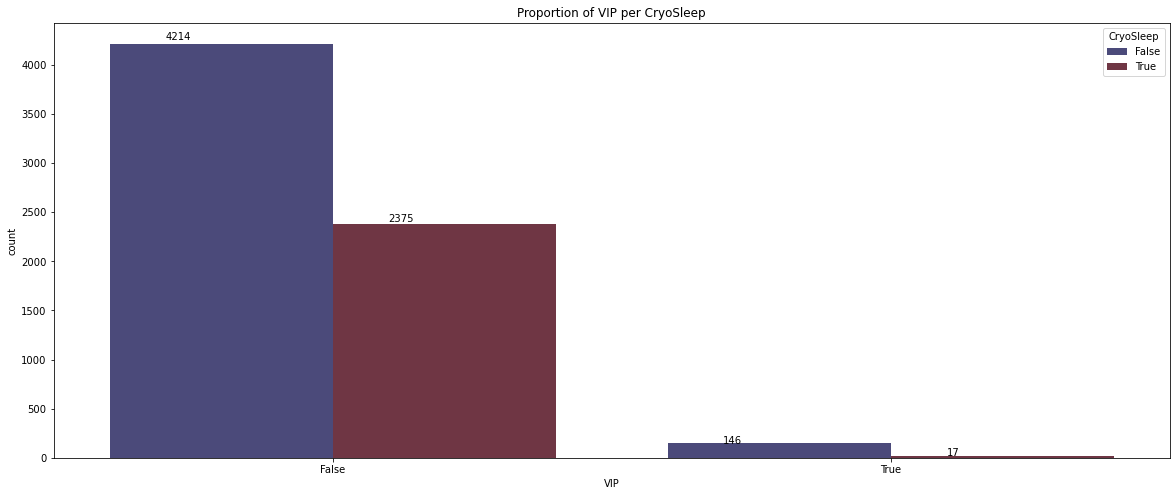

In [13]:
plt.figure(figsize= [20, 8])
ax3= sns.countplot(data=df, x='VIP', hue='CryoSleep', palette="icefire")
for p in ax3.patches:
    ax3.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax3.set_title('Proportion of VIP per CryoSleep')
plt.show()

### Correlation of VIP with HomePlanet.

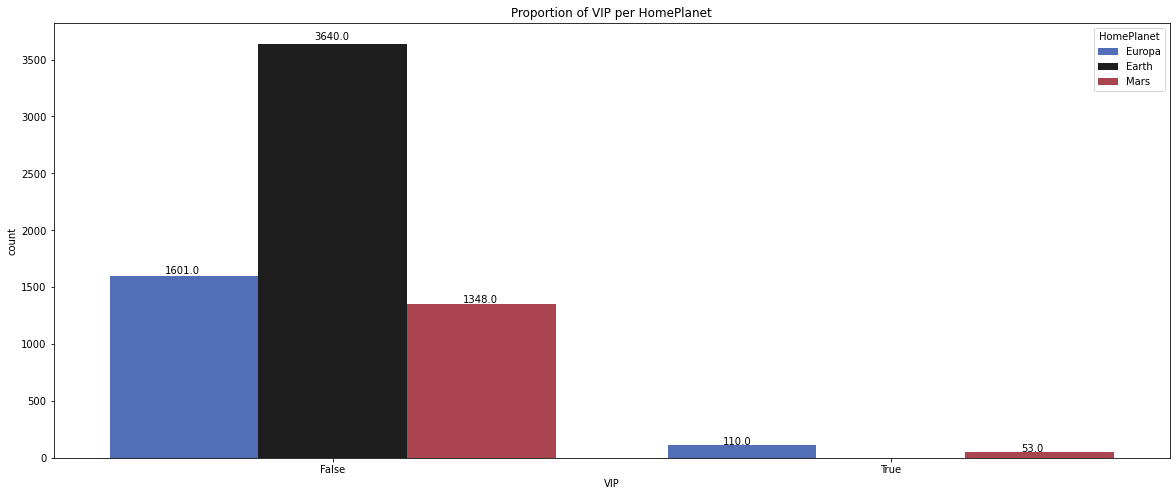

In [14]:
plt.figure(figsize= [20, 8])
ax3= sns.countplot(data=df, x='VIP', hue='HomePlanet', palette="icefire")
for p in ax3.patches:
    ax3.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax3.set_title('Proportion of VIP per HomePlanet')
plt.show()

### Correlation of VIP with Side.

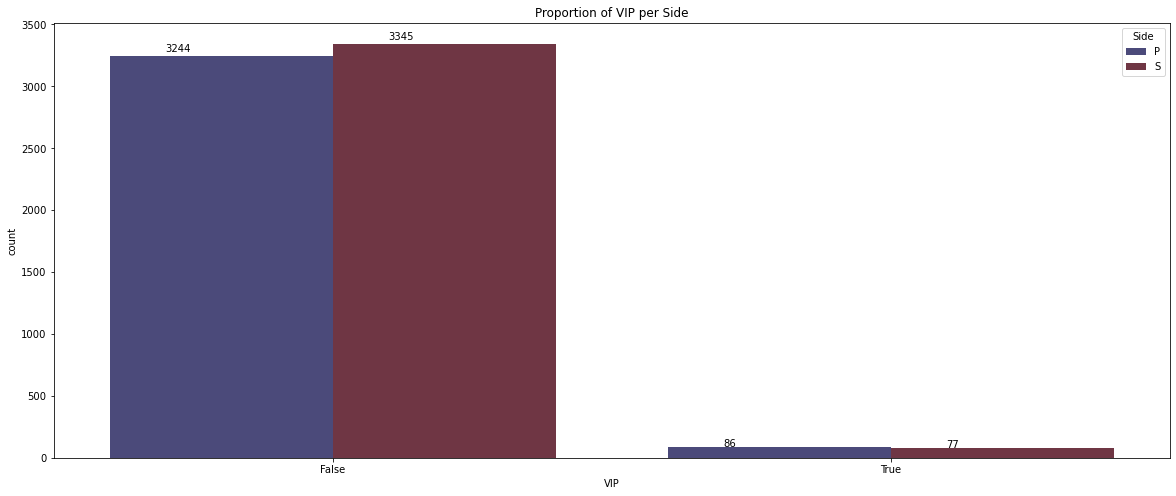

In [15]:
plt.figure(figsize= [20, 8])
ax3= sns.countplot(data=df, x='VIP', hue='Side', palette="icefire")
for p in ax3.patches:
    ax3.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax3.set_title('Proportion of VIP per Side')
plt.show()

### EDA Findings
- #### Transported trends:
    -  Passengers in cryosleep.
    -  children with ages less than 18 and some intermittent ages.
    -  the passengers their staying in the side Port [P] .
- #### General Trends:
    -  Majority of passengers have No luxury amenities.
    -  Earth is the most popular planet the passenger departed from.
    -  TRAPPIST-1e is the most popular planet the passenger will be debarking to.
    -  Very few passengers has paid for special VIP service during the voyage.
    -  Majority of Europa planet passengers has paid for special VIP, and no one from Earth planet has paid for it.
    -  Majority of passengers has paid for special VIP are passengers not in cryosleep.
    -  Age is somewhat normally distributed, with a large number of passengers in ranges 15 to 45 years .

## `5. Data Resampling`

### Countplot of target variable to examine the parity of the classes:

In [16]:
df['Transported'].value_counts()

True     3394
False    3358
Name: Transported, dtype: int64

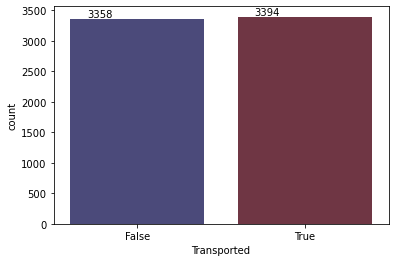

In [17]:
plt.figure()
ax = sns.countplot(x= df['Transported'], palette="icefire")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

plt.show()

In [18]:
# sampling:
df=df.groupby('Transported').sample(3358,random_state=42)
df=df.sort_index()
df.reset_index(drop= True, inplace= True)
df.shape

(6716, 15)

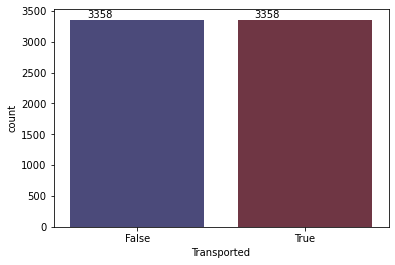

In [19]:
plt.figure()
ax = sns.countplot(x= df['Transported'], palette="icefire")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

plt.show()

## `6. Data Preprocessing`

In [20]:
data= df.drop(['Transported'], axis= 1)
label_data= df['Transported']

# Convert [Transported] target feature to integer:
label_data= label_data.astype('int64')

In [21]:
data.shape

(6716, 14)

In [22]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupPassengerId
count,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000
mean,28.865992,222.668851,470.423020,176.719476,316.445354,303.127159,1.518612
std,14.395392,642.551610,1625.108188,572.787829,1154.635485,1122.931058,1.054909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,49.000000,80.250000,29.000000,66.250000,50.000000,2.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000,8.000000


In [23]:
data.dtypes

HomePlanet           object
CryoSleep            object
Destination          object
Age                 float64
VIP                  object
RoomService         float64
FoodCourt           float64
ShoppingMall        float64
Spa                 float64
VRDeck              float64
GroupPassengerId      int32
Deck                 object
Side                 object
Last_name            object
dtype: object

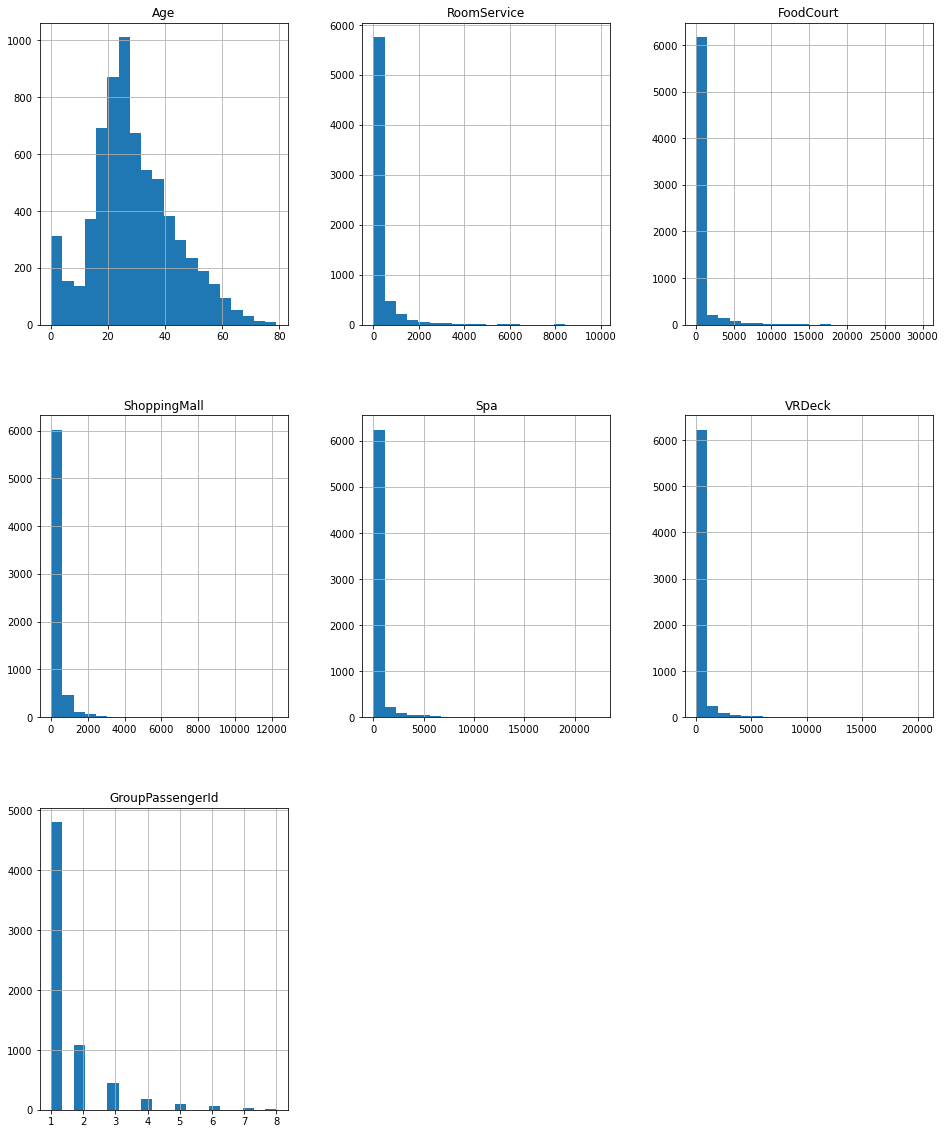

In [24]:
data.hist(figsize=(16, 20), bins=20)            # plot the destribution of numerical features only.
plt.show()

In [25]:
data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'GroupPassengerId',
       'Deck', 'Side', 'Last_name'],
      dtype='object')

In [26]:
data._get_numeric_data().skew()

Age                 0.419567
RoomService         5.521928
FoodCourt           6.786369
ShoppingMall        7.885888
Spa                 7.776641
VRDeck              7.533477
GroupPassengerId    2.742918
dtype: float64

####  check the distribution (with skewness)
- if [ skewness > 1 ] -- such as [ wheelbase, compressionratio, horsepower, price ] are [ 'highly positively skewed' ]
- if [ skewness < -1 ] are [ 'highly negatively skewed' ]
- if [ 0.5 < skewness < 1 ] -- such as [ carwidth, curbweight, citympg ] are [ 'moderately positively skewed' ]
- if [ -0.5 < skewness < -1 ] -- such as [ stroke ] are [ 'moderately negatively skewed' ]
- if [ -0.5 < skewness < 0.5 ] -- such as [ symboling, carlength, carheight, boreration, peakrpm, highwaympg ] are [ 'normally distributed' ]

In [27]:
numerical_cols= data._get_numeric_data().columns
skews_of_numerical_cols= [data[c].skew() for c in numerical_cols]

result = list(zip(numerical_cols, skews_of_numerical_cols))
result

[('Age', 0.419567020285271),
 ('RoomService', 5.521927889469805),
 ('FoodCourt', 6.7863692488974605),
 ('ShoppingMall', 7.885887970817096),
 ('Spa', 7.776640976003206),
 ('VRDeck', 7.533476618171657),
 ('GroupPassengerId', 2.7429178968786285)]

In [28]:
distributed_features= []

for i, j in result:
    if j > -0.5 and j < 0.5:
        distributed_features.append(i)

distributed_features

['Age']

In [29]:
skewed_features = [x for x in numerical_cols if x not in distributed_features]
skewed_features           # i want transform the distribution of this features

['RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'GroupPassengerId']

### Data Transformation
1. #### Transform skewed data to be (normally distributed)
2. #### Standardize data

In [30]:
# This piece of code is special case, which here i convert any zero values in this ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] to epsilon which is very very small value to be able to run the next code which is boxcox transformation because is very sensitive to zeros values. 

for col in skewed_features:
    data[col].replace(0, 0.00000001, inplace= True)

Lambda value used for Transformation: -0.08383633061732887
Lambda value used for Transformation: -0.07620182705823178
Lambda value used for Transformation: -0.08641458097452619
Lambda value used for Transformation: -0.06613591617649574
Lambda value used for Transformation: -0.07782315255969081
Lambda value used for Transformation: -2.9010382010248343


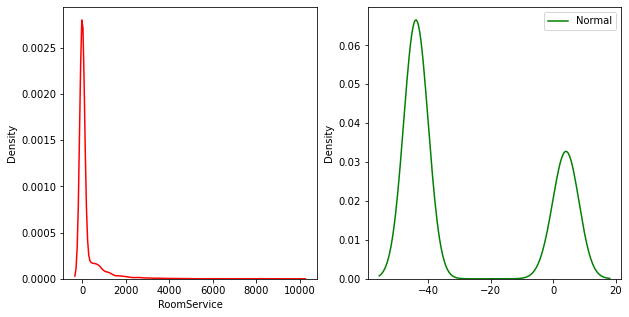

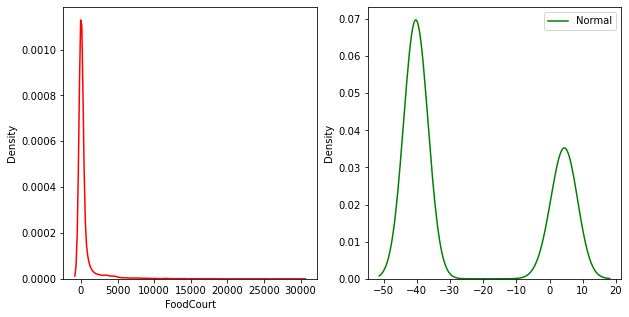

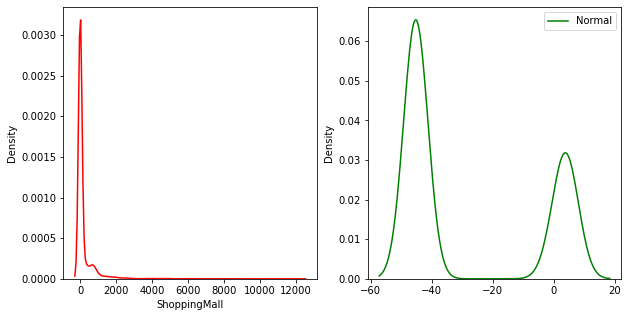

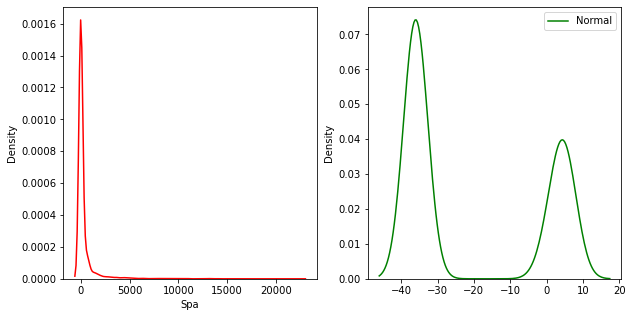

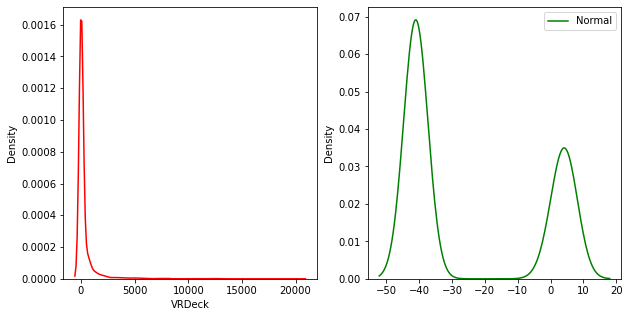

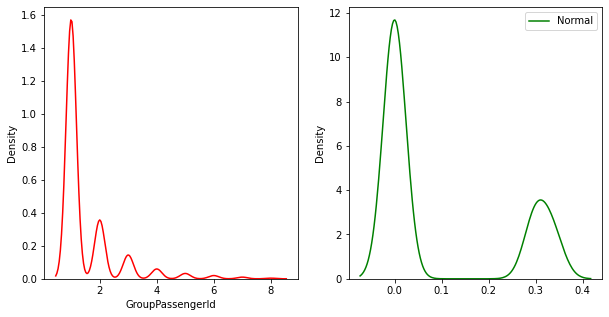

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

for i in skewed_features:
    
    original_data = data[i]

    # transform training data & save lambda value
    fitted_data, fitted_lambda = stats.boxcox(original_data)

    # creating axes to draw plots
    fig, ax = plt.subplots(1, 2)

    # plotting the original data(non-normal) and 
    # fitted data (normal)
    sns.kdeplot(original_data, label = "Non-Normal", color ="red", ax = ax[0])

    sns.kdeplot(fitted_data, label = "Normal", color ="green", ax = ax[1])

    # adding legends to the subplots
    plt.legend(loc = "upper right")

    # rescaling the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)

    print(f"Lambda value used for Transformation: {fitted_lambda}")
    data[i] = fitted_data          # save changes to dataframe after transformation

In [32]:
data[skewed_features]

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupPassengerId
0,-43.952253,-40.290233,-45.277768,-36.006581,-41.036410,0.000000
1,3.878717,2.023131,2.809973,5.157644,3.277871,0.000000
2,3.225910,6.088124,-45.277768,6.678142,3.357711,0.000000
3,-43.952253,5.516594,4.631767,6.277142,4.318215,0.298557
4,4.539904,3.629361,4.071148,5.176554,0.674784,0.000000
...,...,...,...,...,...,...
6711,-43.952253,6.425771,-45.277768,5.854352,3.657400,0.000000
6712,-43.952253,-40.290233,-45.277768,-36.006581,-41.036410,0.000000
6713,-43.952253,-40.290233,5.537666,0.000000,-41.036410,0.000000
6714,-43.952253,5.398978,-45.277768,4.862365,5.998840,0.000000


### Checking after transform data to normal distribution

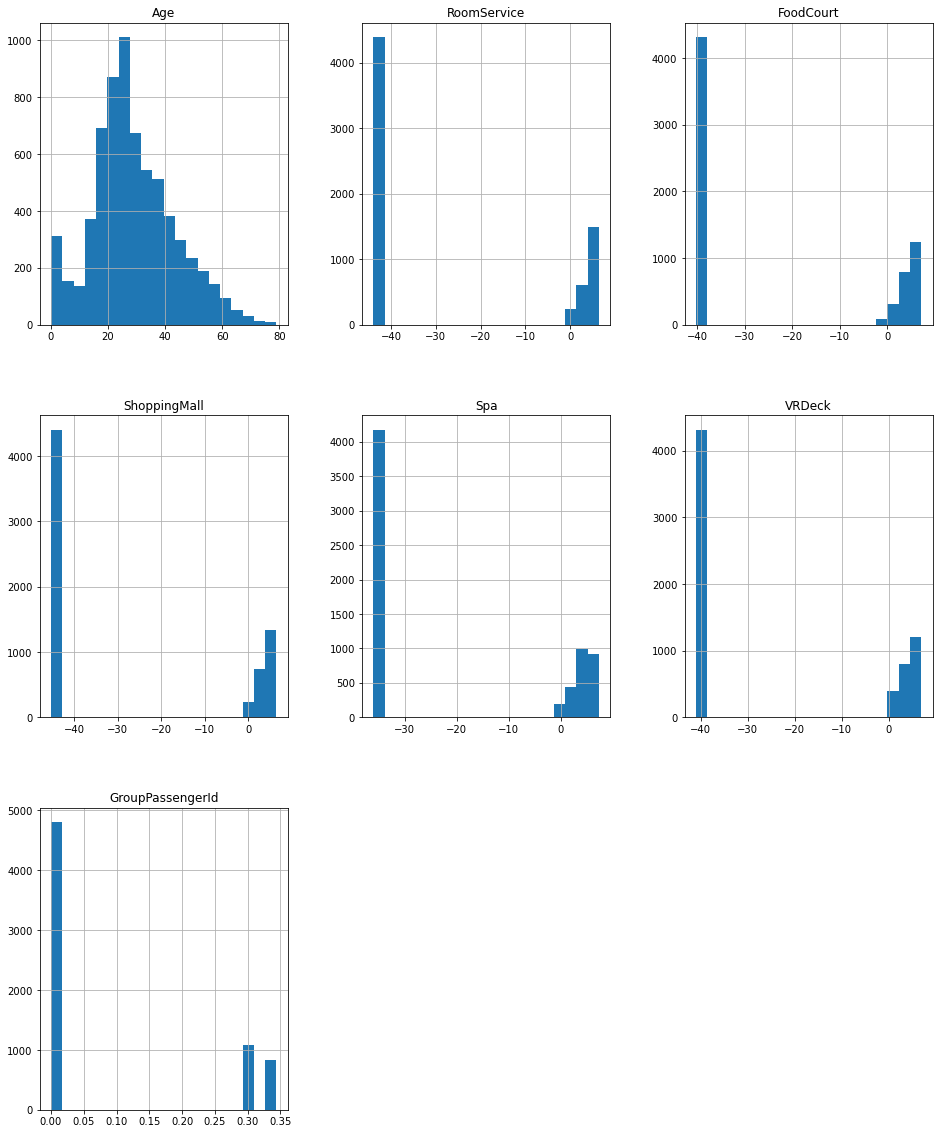

In [33]:
data.hist(figsize=(16, 20), bins=20)            # he will plot the destribution of numerical features only.
plt.show()

### check for unique values in categorical variables

In [34]:
data.dtypes

HomePlanet           object
CryoSleep            object
Destination          object
Age                 float64
VIP                  object
RoomService         float64
FoodCourt           float64
ShoppingMall        float64
Spa                 float64
VRDeck              float64
GroupPassengerId    float64
Deck                 object
Side                 object
Last_name            object
dtype: object

In [35]:
object_cols= [c for c in data.columns if data[c].dtypes == 'O']
for col in object_cols:
    if data[col].dtype=='object':
        print(f'column name is "{col}" \n', data[col].unique())
        print('==='*15) 

column name is "HomePlanet" 
 ['Europa' 'Earth' 'Mars']
column name is "CryoSleep" 
 [False True]
column name is "Destination" 
 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
column name is "VIP" 
 [False True]
column name is "Deck" 
 ['B' 'F' 'A' 'G' 'E' 'C' 'D' 'T']
column name is "Side" 
 ['P' 'S']
column name is "Last_name" 
 ['Ofracculy' 'Vines' 'Susent' ... 'Stranbeate' 'Sionerorly' 'Hontichre']


### Encoding categorical variables using (Label Encoding)

In [36]:
from sklearn.preprocessing import LabelEncoder

cols_categ = ['CryoSleep', 'VIP', 'Last_name']

my_encoder = LabelEncoder()
for i in cols_categ:
    data[i] = my_encoder.fit_transform(data[i])

### Encoding categorical variables using (one hot Encoding)

In [37]:
# one hot encoding :
data_onehot = pd.get_dummies(data= data, columns= ['HomePlanet', 'Destination', 'Deck', 'Side'])
data_onehot.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupPassengerId,Last_name,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39.0,0,-43.952253,-40.290233,-45.277768,-36.006581,-41.036410,0.000000,1365,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,3.878717,2.023131,2.809973,5.157644,3.277871,0.000000,2013,...,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,3.225910,6.088124,-45.277768,6.678142,3.357711,0.000000,1904,...,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,-43.952253,5.516594,4.631767,6.277142,4.318215,0.298557,1904,...,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,4.539904,3.629361,4.071148,5.176554,0.674784,0.000000,1702,...,0,0,0,0,0,1,0,0,0,1


In [38]:
data_onehot.shape

(6716, 26)

In [39]:
data_onehot.dtypes

CryoSleep                      int32
Age                          float64
VIP                            int32
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
GroupPassengerId             float64
Last_name                      int32
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
Deck_A                         uint8
Deck_B                         uint8
Deck_C                         uint8
Deck_D                         uint8
Deck_E                         uint8
Deck_F                         uint8
Deck_G                         uint8
Deck_T                         uint8
Side_P                         uint8
Side_S                         uint8
dtype: object

### Data Standardization

In [40]:
from sklearn.preprocessing import StandardScaler

columns_will_standard= [c for c in data_onehot.columns if data_onehot[c].dtypes == 'float64']
columns_will_standard= [*columns_will_standard, *['Last_name']]
rest_of_features= data_onehot.drop(columns_will_standard, axis= 1)      # numerical features without uint8.

scaler = StandardScaler()
data_onehot[columns_will_standard] = scaler.fit_transform(data_onehot[columns_will_standard])
scaled_data= pd.concat([data_onehot[rest_of_features.columns], data_onehot[columns_will_standard]], axis= 1)
scaled_data.head()

,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,...,Side_P,Side_S,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupPassengerId,Last_name
0,0,0,0,1,0,0,0,1,0,1,...,1,0,0.704028,-0.727070,-0.744868,-0.723718,-0.778187,-0.744172,-0.629821,0.495426
1,0,0,1,0,0,0,0,1,0,0,...,0,1,-0.338049,1.367983,1.233075,1.340262,1.335127,1.307420,-0.629821,1.552716
2,0,1,0,1,0,0,0,1,1,0,...,0,1,2.023993,1.339389,1.423094,-0.723718,1.413188,1.311117,-0.629821,1.374869
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0.287197,-0.727070,1.396378,1.418456,1.392601,1.355584,1.469256,1.374869
4,0,0,1,0,0,0,0,1,0,0,...,0,1,-0.893824,1.396944,1.308159,1.394393,1.336098,1.186907,-0.629821,1.045282


### Convert [ uint8 ] variables datatypes to [ int ]

In [41]:
Columns= scaled_data.columns

for c in Columns:
    if scaled_data[c].dtype == 'uint8':
        scaled_data[c]= scaled_data[c].astype('int64')
        
scaled_data.dtypes

CryoSleep                      int32
VIP                            int32
HomePlanet_Earth               int64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
Destination_55 Cancri e        int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
Deck_A                         int64
Deck_B                         int64
Deck_C                         int64
Deck_D                         int64
Deck_E                         int64
Deck_F                         int64
Deck_G                         int64
Deck_T                         int64
Side_P                         int64
Side_S                         int64
Age                          float64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
GroupPassengerId             float64
Last_name                    float64
dtype: object

In [42]:
scaled_data.describe()

,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,...,Side_P,Side_S,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupPassengerId,Last_name
count,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,...,6716.000000,6716.000000,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03,6.716000e+03
mean,0.353782,0.024270,0.539309,0.252829,0.207862,0.212031,0.093955,0.694014,0.031715,0.094104,...,0.493151,0.506849,5.210576e-17,-2.500812e-16,-4.790688e-17,-2.483620e-16,6.992620e-18,-2.067699e-16,4.274259e-16,7.567073e-17
std,0.478178,0.153899,0.498490,0.434666,0.405808,0.408777,0.291787,0.460858,0.175254,0.291995,...,0.499990,0.499990,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.005374e+00,-7.270700e-01,-7.448681e-01,-7.237184e-01,-7.781873e-01,-7.441721e-01,-6.298212e-01,-1.731737e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-6.159368e-01,-7.270700e-01,-7.448681e-01,-7.237184e-01,-7.781873e-01,-7.441721e-01,-6.298212e-01,-8.604511e-01
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,-1.296339e-01,-7.270700e-01,-7.448681e-01,-7.237184e-01,-7.781873e-01,-7.441721e-01,-6.298212e-01,-2.218577e-03
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,6.345564e-01,1.343540e+00,1.312755e+00,1.345055e+00,1.258351e+00,1.311807e+00,1.469256e+00,8.401056e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,3.482902e+00,1.479005e+00,1.472164e+00,1.496152e+00,1.446389e+00,1.475671e+00,1.787891e+00,1.724036e+00


### Study the Correlation

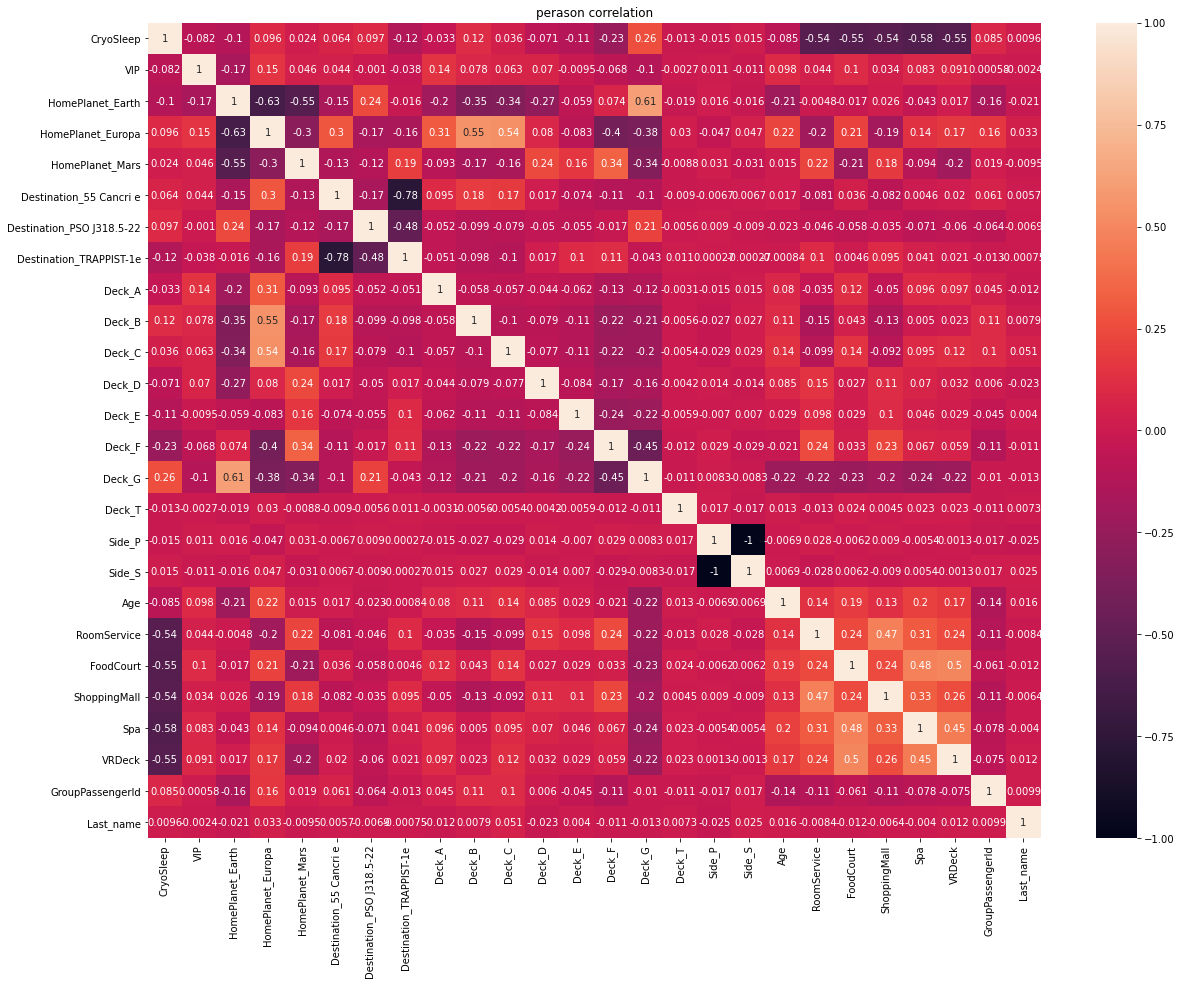

In [43]:
plt.figure(figsize=(20, 15))
sns.heatmap(scaled_data.corr(), annot=True, cbar=True)         ## Linear correlation
plt.title('perason correlation');

_____
_____

## `7. Modeling`:
- #### We will be applying some classification models including:
    1. LogisticRegression
    2. KNeighborsClassifier
    3. DecisionTreeClassifier
    4. RandomForestClassifier
    5. GradientBoostingClassifier
    6. Support Vector Machine (SVM)
    7. naive_bayes classifier (GaussianNB)
    8. SGDClassifier
 
- #### We will evaluate each model by matrices:
    1. mean_squared_error
    2. accuracy_score
    3. roc_auc_score
    4. recall_score
    5. precision_score
    6. f1_score
    7. confusion_matrix
    

In [44]:
## Train Test split:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(scaled_data, label_data, test_size = 0.2, random_state = 42)

### 1. LogisticRegression

Accuracy_score on train :  0.7492553983618764
Accuracy_score on test :  0.7254464285714286

MSE on train :  0.2507
MSE on test :  0.2746

roc_auc_score is on train :  0.7491421759726106
roc_auc score on test :  0.7262134438481116


 TN: 511 
 FP: 150 
 FN: 219 
 TP: 464
***********************************
Recall Accuracy:  0.6793557833089312
***********************************
Precision Accuracy:  0.755700325732899
***********************************
f1 score:  0.7154973014649191
***********************************


C:\Users\nooor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix')

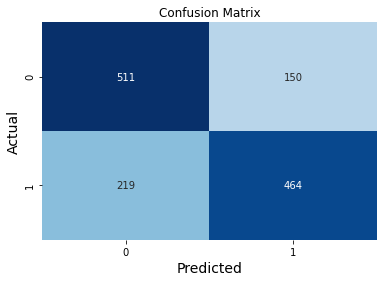

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix


LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pre = LR.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, LR.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'MSE on train : ', round(mean_squared_error(y_train, LR.predict(X_train)), 4) )
print( 'MSE on test : ', round(mean_squared_error(y_test, y_pre), 4) )
print('')

print( 'roc_auc_score is on train : ', roc_auc_score(y_train, LR.predict(X_train)) )
print( 'roc_auc score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')
plt.show()


### 2. KNeighborsClassifier

Accuracy_score on train :  0.766939687267312
Accuracy_score on test :  0.7291666666666666

roc_auc_score is on train :  0.7665210566257421
roc_auc score on test :  0.7310432970143733


MSE on train :  0.1586
MSE on test :  0.317

 TN: 559 
 FP: 102 
 FN: 262 
 TP: 421
***********************************
Recall Accuracy:  0.616398243045388
***********************************
Precision Accuracy:  0.8049713193116634
***********************************
f1 score:  0.6981757877280266
***********************************
The best Parameters is:  {'n_neighbors': 20}
***********************************
The best estimator is:  KNeighborsClassifier(n_neighbors=20)
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

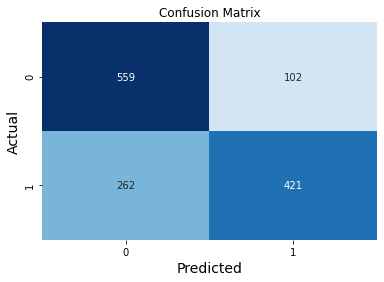

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


param_grid = {"n_neighbors": [3,5,10,20,50,75]}

KNN = KNeighborsClassifier()
Accuracies_KNN= GridSearchCV(KNN, param_grid, cv=5, n_jobs=4)  # n_jobs= 4  --> means Use 4 cores for processing in parallel
Accuracies_KNN.fit(X_train, y_train)
y_pre= Accuracies_KNN.best_estimator_.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, Accuracies_KNN.best_estimator_.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'roc_auc_score is on train : ', roc_auc_score(y_train, Accuracies_KNN.best_estimator_.predict(X_train)) )
print( 'roc_auc score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')


MSE = make_scorer(mean_squared_error)
MSE_Knn = GridSearchCV(KNN, param_grid, cv=5, scoring= MSE)
MSE_Knn.fit(X_train, y_train)
y_pre_mse= MSE_Knn.best_estimator_.predict(X_test)

print( 'MSE on train : ', round(mean_squared_error(y_train, MSE_Knn.best_estimator_.predict(X_train)), 4) )
print( 'MSE on test : ', round(mean_squared_error(y_test, y_pre_mse), 4) )
print('')


# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)
print( 'The best Parameters is: ', Accuracies_KNN.best_params_)
print('*******'*5)
print( 'The best estimator is: ', Accuracies_KNN.best_estimator_)
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')
plt.show()


### 3. DecisionTreeClassifier

In [47]:
# Here i will make GridSearchCV in another way, but the same result as the first way:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

def gbm_grid_search(max_depth, min_samples, max_features):
    model = DecisionTreeClassifier(max_depth= max_depth,
                                   min_samples_split= min_samples,
                                   max_features= max_features)
    model.fit(X_train, y_train)
    y_pre= model.predict(X_test)
    
    return([max_depth, min_samples, max_features, mean_squared_error(y_train, model.predict(X_train)),
            mean_squared_error(y_test, y_pre), accuracy_score(y_test, y_pre), roc_auc_score(y_test, y_pre),
            recall_score(y_test, y_pre), precision_score(y_test, y_pre), f1_score(y_test, y_pre),
            confusion_matrix(y_test, y_pre)])

    
max_depth_list = [4, 6, 8, 10, 12, 15, 20, 25, 30, None]
min_samples_list = [2, 4, 6, 8, 10, 12]
max_features_list = ['auto', 'sqrt', 'log2', None]
results_list = []

for max_depth in max_depth_list:
    for min_sample in min_samples_list:
        for max_feature in max_features_list:
            results_list.append(gbm_grid_search(max_depth, min_sample, max_feature))
      
    
results_df= pd.DataFrame(results_list, columns= ['Max_depth', 'Min_samples_split', 'Max_features', 'Train_MSE', 'Test_MSE', 'accuracy_score', 'roc_auc_score', 'recall_score', 'precision_score', 'f1_score', 'confusion_matrix'])
results_df.sort_values(by= ['Test_MSE'], inplace= True)
results_df.reset_index(inplace= True, drop= True)
results_df


,Max_depth,Min_samples_split,Max_features,Train_MSE,Test_MSE,accuracy_score,roc_auc_score,recall_score,precision_score,f1_score,confusion_matrix
0,8.0,10,None,0.159717,0.226190,0.773810,0.774090,0.756955,0.789313,0.772795,"[[523, 138], [166, 517]]"
1,8.0,8,None,0.159345,0.226190,0.773810,0.774090,0.756955,0.789313,0.772795,"[[523, 138], [166, 517]]"
2,8.0,12,None,0.160462,0.227679,0.772321,0.772626,0.754026,0.788668,0.770958,"[[523, 138], [168, 515]]"
3,8.0,6,None,0.157111,0.227679,0.772321,0.772577,0.756955,0.786910,0.771642,"[[521, 140], [166, 517]]"
4,8.0,4,None,0.156552,0.227679,0.772321,0.772602,0.755490,0.787786,0.771300,"[[522, 139], [167, 516]]"
...,...,...,...,...,...,...,...,...,...,...,...
235,20.0,2,auto,0.024386,0.293155,0.706845,0.706986,0.698389,0.717293,0.707715,"[[473, 188], [206, 477]]"
236,30.0,8,sqrt,0.083395,0.293155,0.706845,0.707351,0.676428,0.727559,0.701062,"[[488, 173], [221, 462]]"
237,30.0,6,log2,0.074088,0.295387,0.704613,0.705423,0.655930,0.734426,0.692962,"[[499, 162], [235, 448]]"
238,25.0,10,auto,0.101080,0.296131,0.703869,0.704472,0.667643,0.727273,0.696183,"[[490, 171], [227, 456]]"


____
#### then the best acuracy is [ `0.787402` ]  which it's parameters is [ `Max_depth`= 8, `Min_samples_split`= 10, `Max_features`= None ]
#### then i need to see the `TN`, `TP`, `FN`, `FP` and `confusion_matrix figure` of the model of this parameters

 TN: 522 
 FP: 139 
 FN: 166 
 TP: 517
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

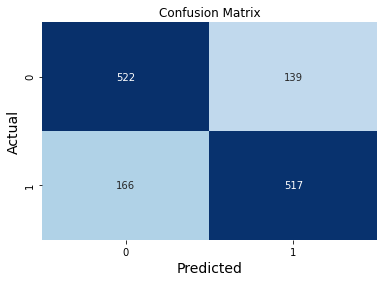

In [48]:
model = DecisionTreeClassifier(max_depth= 8, min_samples_split= 10, max_features= None)
model.fit(X_train, y_train)
y_pre= model.predict(X_test)

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)

## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')
plt.show()


### 4. RandomForestClassifier

Accuracy_score on train :  1.0
Accuracy_score on test :  0.7760416666666666

roc_auc_score is on train :  1.0
roc_auc score on test :  0.7768466075846747


MSE on train :  0.2299
MSE on test :  0.2641

 TN: 546 
 FP: 115 
 FN: 186 
 TP: 497
***********************************
Recall Accuracy:  0.7276720351390923
***********************************
Precision Accuracy:  0.8120915032679739
***********************************
f1 score:  0.7675675675675675
***********************************
The best Parameters is:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2}
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

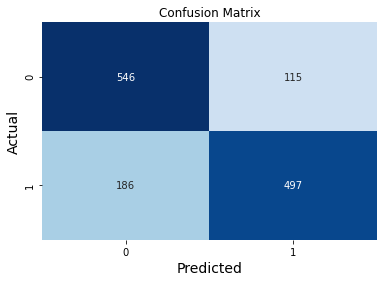

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


param_grid = {"max_depth": [4, 6, None],
              "max_features": ['sqrt'],
              "min_samples_split": range(2, 5)}

RF = RandomForestClassifier(n_estimators=100, random_state=1111)
Accuracies_RF= GridSearchCV(RF, param_grid, cv=5, n_jobs=4)  # n_jobs= 4  --> means Use 4 cores for processing in parallel
Accuracies_RF.fit(X_train, y_train)
y_pre= Accuracies_RF.best_estimator_.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, Accuracies_RF.best_estimator_.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'roc_auc_score is on train : ', roc_auc_score(y_train, Accuracies_RF.best_estimator_.predict(X_train)) )
print( 'roc_auc score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')


MSE = make_scorer(mean_squared_error)
MSE_RF = GridSearchCV(RF, param_grid, cv=5, scoring= MSE)
MSE_RF.fit(X_train, y_train)
y_pre_mse= MSE_RF.best_estimator_.predict(X_test)

print( 'MSE on train : ', round(mean_squared_error(y_train, MSE_RF.best_estimator_.predict(X_train)), 4) )
print( 'MSE on test : ', round(mean_squared_error(y_test, y_pre_mse), 4) )
print('')


# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)
print( 'The best Parameters is: ', Accuracies_RF.best_params_)
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')
plt.show()


### 5. GradientBoostingClassifier

Accuracy_score on train :  0.8296723752792257
Accuracy_score on test :  0.7938988095238095

roc_auc_score is on train :  0.8298242768877846
roc_auc score on test :  0.7935633706416694


MSE on train :  0.2236
MSE on test :  0.2582

 TN: 511 
 FP: 150 
 FN: 127 
 TP: 556
***********************************
Recall Accuracy:  0.8140556368960469
***********************************
Precision Accuracy:  0.7875354107648725
***********************************
f1 score:  0.8005759539236862
***********************************
The best Parameters is:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.4}
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

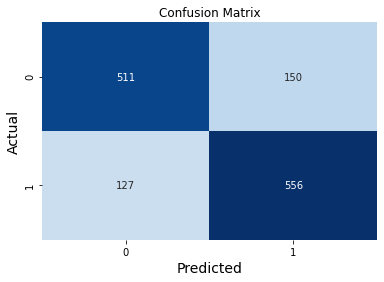

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


param_grid = {"learning_rate": [0.001, 0.01, 0.1],
              "subsample": [0.4, 1],
              "max_depth": [3, 6]}

GBoost = GradientBoostingClassifier()
Accuracies_GBoost= GridSearchCV(GBoost, param_grid, cv=5, n_jobs=4)       # n_jobs= 4  --> means Use 4 cores for processing in parallel
Accuracies_GBoost.fit(X_train, y_train)
y_pre= Accuracies_GBoost.best_estimator_.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, Accuracies_GBoost.best_estimator_.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'roc_auc_score is on train : ', roc_auc_score(y_train, Accuracies_GBoost.best_estimator_.predict(X_train)) )
print( 'roc_auc score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')


MSE = make_scorer(mean_squared_error)
MSE_GBoost = GridSearchCV(GBoost, param_grid, cv=5, scoring= MSE)
MSE_GBoost.fit(X_train, y_train)
y_pre_mse= MSE_GBoost.best_estimator_.predict(X_test)

print( 'MSE on train : ', round(mean_squared_error(y_train, MSE_GBoost.best_estimator_.predict(X_train)), 4) )
print( 'MSE on test : ', round(mean_squared_error(y_test, y_pre_mse), 4) )
print('')


# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)
print( 'The best Parameters is: ', Accuracies_GBoost.best_params_)
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')
plt.show()


### 6. Support Vector Machine (SVM)

Accuracy_score on train :  0.7714072970960536
Accuracy_score on test :  0.7351190476190477

MSE on train :  0.2286
MSE on test :  0.2649

roc_auc_score on train :  0.7711945775680142
roc_auc_score on test :  0.7361688554765287


 TN: 529 
 FP: 132 
 FN: 224 
 TP: 459
***********************************
Recall Accuracy:  0.6720351390922401
***********************************
Precision Accuracy:  0.7766497461928934
***********************************
f1 score:  0.7205651491365777
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

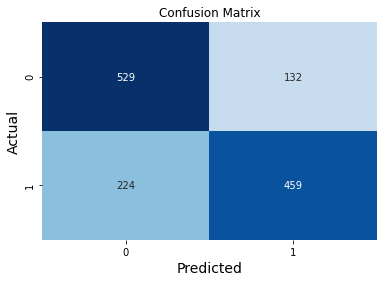

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

svm_model = SVC(probability=True)        # default [ kernel='rbf' ]
svm_model.fit(X_train, y_train)
y_pre = svm_model.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, svm_model.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'MSE on train : ', round(mean_squared_error(y_train, svm_model.predict(X_train)), 4) )
print( 'MSE on test : ', round(mean_squared_error(y_test, y_pre), 4) )
print('')

print( 'roc_auc_score on train : ', roc_auc_score(y_train, svm_model.predict(X_train)) )
print( 'roc_auc_score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')
plt.show()


### 7. GaussianNB

Accuracy_score on train :  0.7319434102755026
Accuracy_score on test :  0.6941964285714286

MSE on train :  0.2681
MSE on test :  0.3058

roc_auc_score on train :  0.7319129943620293
roc_auc_score on test :  0.694492128923079


 TN: 471 
 FP: 190 
 FN: 221 
 TP: 462
***********************************
Recall Accuracy:  0.6764275256222547
***********************************
Precision Accuracy:  0.7085889570552147
***********************************
f1 score:  0.6921348314606742
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

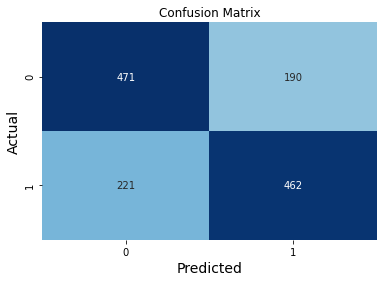

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix

NB = GaussianNB()        
NB.fit(X_train, y_train)
y_pre = NB.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, NB.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'MSE on train : ', round(mean_squared_error(y_train, NB.predict(X_train)), 4) )
print( 'MSE on test : ', round(mean_squared_error(y_test, y_pre), 4) )
print('')

print( 'roc_auc_score on train : ', roc_auc_score(y_train, NB.predict(X_train)) )
print( 'roc_auc_score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')
plt.show()


### 8. Gradient Descent ( SGDClassifier )

Accuracy_score on train :  0.7475800446760983
Accuracy_score on test :  0.7224702380952381

MSE on train :  0.2524199553239017
MSE on test :  0.2775297619047619

roc_auc_score on train :  0.7474294387325482
roc_auc_score on test :  0.7231389947791956


 TN: 505 
 FP: 156 
 FN: 217 
 TP: 466
***********************************
Recall Accuracy:  0.6822840409956076
***********************************
Precision Accuracy:  0.7491961414790996
***********************************
f1 score:  0.7141762452107279
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

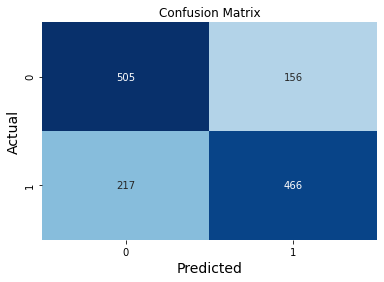

In [52]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix

SGD = SGDClassifier()        
SGD.fit(X_train, y_train)
y_pre = SGD.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, SGD.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'MSE on train : ', round(mean_squared_error(y_train, SGD.predict(X_train)), 4) )
print( 'MSE on test : ', round(mean_squared_error(y_test, y_pre), 4) )
print('')

print( 'roc_auc_score on train : ', roc_auc_score(y_train, SGD.predict(X_train)) )
print( 'roc_auc_score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')
plt.show()


## `8. Results`

In [54]:
# print accuracy score for each model

print('Logistic Regression: ', '\t', accuracy_score(y_test, LR.predict(X_test)))
print('KNN: ', '\t\t\t', accuracy_score(y_test, Accuracies_KNN.best_estimator_.predict(X_test)))
print('DecisionTree: ', '\t\t', accuracy_score(y_test, model.predict(X_test)))
print('RandomForest: ', '\t\t', accuracy_score(y_test, Accuracies_RF.best_estimator_.predict(X_test)))
print('GradientBoosting: ', '\t', accuracy_score(y_test, Accuracies_GBoost.best_estimator_.predict(X_test)))
print('SVM: ', '\t\t\t', accuracy_score(y_test, svm_model.predict(X_test)))
print('Naive Bayes: ', '\t\t', accuracy_score(y_test, NB.predict(X_test)))
print('Gradient Decent: ', '\t', accuracy_score(y_test, SGD.predict(X_test)))

Logistic Regression:  	 0.7254464285714286
KNN:  			 0.7291666666666666
DecisionTree:  		 0.7730654761904762
RandomForest:  		 0.7760416666666666
GradientBoosting:  	 0.7938988095238095
SVM:  			 0.7351190476190477
Naive Bayes:  		 0.6941964285714286
Gradient Decent:  	 0.7224702380952381


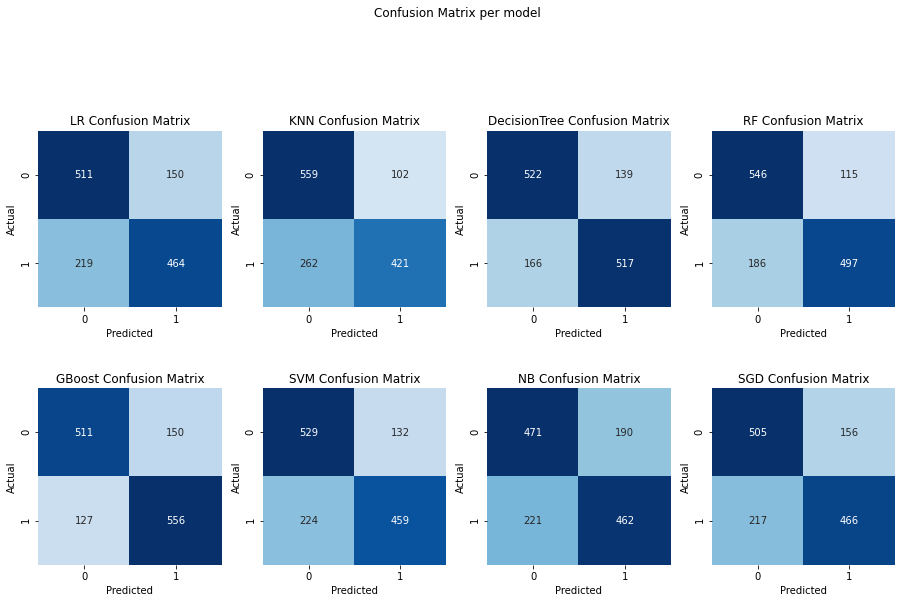

In [55]:
fig, axes= plt.subplots(2, 4, figsize= [14, 9])

fig.suptitle('Confusion Matrix per model ')
fig.tight_layout(pad=6, w_pad= True)

# plot Logistic Regression
p1= sns.heatmap(confusion_matrix(y_test, LR.predict(X_test)), ax=axes[0, 0], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p1.set_xlabel('Predicted', fontsize=10)
p1.set_ylabel('Actual', fontsize=10)
p1.set_title('LR Confusion Matrix', fontsize=12)

# plot KNN
p2= sns.heatmap(confusion_matrix(y_test, Accuracies_KNN.best_estimator_.predict(X_test)), ax=axes[0, 1], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p2.set_xlabel('Predicted', fontsize=10)
p2.set_ylabel('Actual', fontsize=10)
p2.set_title('KNN Confusion Matrix', fontsize=12)

# plot DecisionTree
p3= sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), ax=axes[0, 2], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p3.set_xlabel('Predicted', fontsize=10)
p3.set_ylabel('Actual', fontsize=10)
p3.set_title('DecisionTree Confusion Matrix', fontsize=12)

# plot RandomForest 
p4= sns.heatmap(confusion_matrix(y_test, Accuracies_RF.best_estimator_.predict(X_test)), ax=axes[0, 3], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p4.set_xlabel('Predicted', fontsize=10)
p4.set_ylabel('Actual', fontsize=10)
p4.set_title('RF Confusion Matrix', fontsize=12)

# plot GradientBoosting
p5= sns.heatmap(confusion_matrix(y_test, Accuracies_GBoost.best_estimator_.predict(X_test)), ax=axes[1, 0], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p5.set_xlabel('Predicted', fontsize=10)
p5.set_ylabel('Actual', fontsize=10)
p5.set_title('GBoost Confusion Matrix', fontsize=12)

# plot SVM
p6= sns.heatmap(confusion_matrix(y_test, svm_model.predict(X_test)), ax=axes[1, 1], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p6.set_xlabel('Predicted', fontsize=10)
p6.set_ylabel('Actual', fontsize=10)
p6.set_title('SVM Confusion Matrix', fontsize=12)

# plot Naive Bayes
p7= sns.heatmap(confusion_matrix(y_test, NB.predict(X_test)), ax=axes[1, 2], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p7.set_xlabel('Predicted', fontsize=10)
p7.set_ylabel('Actual', fontsize=10)
p7.set_title('NB Confusion Matrix', fontsize=12)

# plot Gradient Decent
p8= sns.heatmap(confusion_matrix(y_test, SGD.predict(X_test)), ax=axes[1, 3], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p8.set_xlabel('Predicted', fontsize=10)
p8.set_ylabel('Actual', fontsize=10)
p8.set_title('SGD Confusion Matrix', fontsize=12)

plt.show()

________
________
#### After comparing the eight models, as shown, the `GradientBoostingClassifier` is the most model with the `more score` and `least overfitting`,
#### And the most model has the best `confusion matrix` (Which `TN` & `TP`) is very high more than `FN` & `FP`

Accuracy_score on train :  0.8320923306031274
Accuracy_score on test :  0.7872023809523809

roc_auc_score is on train :  0.8321870960811425
roc_auc score on test :  0.7869016951555277


MSE on train :  0.2249
MSE on test :  0.2582

 TN: 508 
 FP: 153 
 FN: 133 
 TP: 550
***********************************
Recall Accuracy:  0.8052708638360175
***********************************
Precision Accuracy:  0.7823613086770982
***********************************
f1 score:  0.7936507936507937
***********************************
The best Parameters is:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.4}
***********************************


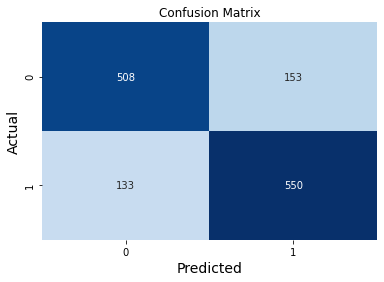

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


param_grid = {"learning_rate": [0.001, 0.01, 0.1],
              "subsample": [0.4, 1],
              "max_depth": [3, 6]}

GBoost = GradientBoostingClassifier()
Accuracies_GBoost= GridSearchCV(GBoost, param_grid, cv=5, n_jobs=4)       # n_jobs= 4  --> means Use 4 cores for processing in parallel
Accuracies_GBoost.fit(X_train, y_train)
y_pre= Accuracies_GBoost.best_estimator_.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, Accuracies_GBoost.best_estimator_.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'roc_auc_score is on train : ', roc_auc_score(y_train, Accuracies_GBoost.best_estimator_.predict(X_train)) )
print( 'roc_auc score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')


MSE = make_scorer(mean_squared_error)
MSE_GBoost = GridSearchCV(GBoost, param_grid, cv=5, scoring= MSE)
MSE_GBoost.fit(X_train, y_train)
y_pre_mse= MSE_GBoost.best_estimator_.predict(X_test)

print( 'MSE on train : ', round(mean_squared_error(y_train, MSE_GBoost.best_estimator_.predict(X_train)), 4) )
print( 'MSE on test : ', round(mean_squared_error(y_test, y_pre_mse), 4) )
print('')


# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)
print( 'The best Parameters is: ', Accuracies_GBoost.best_params_)
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')
plt.show()
